# Velocity of Bitcoins

This notebook reproduces the figure "Two estimates of the velocity of bitcoins" from the BlockSci paper.

In [1]:
import blocksci

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [3]:
import utils

In [4]:
chain = blocksci.Blockchain(utils.blocksci_config())

In [5]:
min_block_height = chain.blocks.where(lambda b: (b.time.month == 1) & (b.time.year == 2017)).height.min()

In [6]:
# max_block_height = chain.blocks.where(lambda b: (b.time.month == 12) & (b.time.year == 2019)).height.max() + 1

In [7]:
print(min_block_height)

446033


In [8]:
cm_base = blocksci.cluster.ClusterManager(utils.latest_clustering(), chain)

In [9]:
cm_refined = blocksci.cluster.ClusterManager("/home/ubuntu/Data/clusters/20210804-refined-smart", chain)

In [10]:
blocks = chain[min_block_height:]

## Improved estimate

In [11]:
%time totals = [(block.time, blocksci.cluster.total_without_self_churn(block, cm_base), blocksci.cluster.total_without_self_churn(block, cm_refined), block.output_value) for block in blocks]

CPU times: user 12min 56s, sys: 27.8 s, total: 13min 24s
Wall time: 13min 56s


In [12]:
df = pd.DataFrame(totals, columns=["Date", "BlockSci estimate", "Improved estimate", "Naive estimate"])
df.index = df["Date"]
df["Improved estimate"] /= 1e8
df["BlockSci estimate"] /= 1e8
df["Naive estimate"] /= 1e8

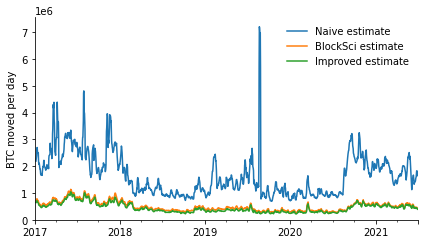

In [13]:
ax = df.resample("1 d").sum().rolling(7).mean().plot(y=["Naive estimate", "BlockSci estimate", "Improved estimate"], figsize=(6, 3.5))
ax.ticklabel_format(axis="y",scilimits=(6,6))
ax.set_ylabel("BTC moved per day")
ax.set_ylim(0)
ax.set_xlabel("")
ax.legend(frameon=False)
plt.tight_layout()
sns.despine()

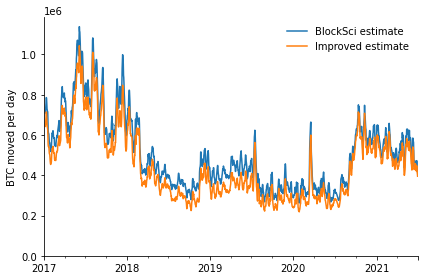

In [14]:
ax = df.resample("1 d").sum().rolling(7).mean().plot(y=["BlockSci estimate", "Improved estimate"])
ax.ticklabel_format(axis="y",scilimits=(6,6))
ax.set_ylabel("BTC moved per day")
ax.set_ylim(0)
ax.set_xlabel("")
ax.legend(frameon=False)
plt.tight_layout()
sns.despine()
plt.savefig("figures/velocity-improvement.pdf")

In [15]:
df["BlockSci estimate"].sum() - df["Improved estimate"].sum()

98964808.26009607

In [16]:
(df["BlockSci estimate"].sum() - df["Improved estimate"].sum()) / df["BlockSci estimate"].sum()

0.11915582177141465